In [ ]:
!pip install haversine

time: 2.12 s


In [ ]:
!pip install ipython-autotime
 
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.12 s


In [ ]:
!pip install matplotlib

time: 2.02 s


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 1.99 ms


In [ ]:
import numpy as np
import pandas as pd
from haversine import haversine
from random import randrange
import random
import matplotlib.pyplot as plt

time: 1.97 ms


In [31]:
df3 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/GeneticRedistricting/neighbormatrix_alphebatized.csv")
neighbormatrix = df3.to_numpy() # This is the array of neighbor matrix
print(neighbormatrix)

dfc = pd.read_csv("/content/drive/My Drive/Colab Notebooks/GeneticRedistricting/centroids.csv")
centroids = dfc[['x', 'y']].to_numpy()

dfpa = pd.read_csv("/content/drive/My Drive/Colab Notebooks/GeneticRedistricting/countypoparea.csv")
poparea = dfpa[['population', 'area(km)']].to_numpy()

dfn = pd.read_csv("/content/drive/My Drive/Colab Notebooks/GeneticRedistricting/countynames.csv")
names = dfn.to_numpy()  # have to call like names[county#][0] for actual string

state_population = 9958995
num_of_districts = 14
population_size = 50
child_multiplier = 1
num_generations = 150
mutation_prob = 0.3
crossover_prob = 0
population = []
children = []
parents = []
best = []
fitness = [] 
best_fit = 0

#########################################################################################

def reock(disList):
    longest_distance = 0

    if len(disList) > 1:
        if len(disList) == 2:
            longest_distance = haversine(centroids[disList[0]], centroids[disList[1]])
            if longest_distance == 0:
                longest_distance = np.sqrt(poparea[disList[0]][1] / np.pi) * 2

        else:
            for dist1 in disList:
                for dist2 in disList:
                    if haversine(centroids[dist1], centroids[dist2]) > longest_distance:

                        longest_distance = haversine(centroids[dist1], centroids[dist2])

    else:
        longest_distance = np.sqrt(poparea[disList[0]][1] / np.pi) * 2

    radius = longest_distance / 2
    circle_area = (radius**2) * np.pi

    district_area = 0

    for district in disList:
        district_area += poparea[district][1]

    score = district_area / circle_area
    return score * 100

def equal_pop(disList):
    district_pop = 0
    target_population = state_population / num_of_districts

    for district in disList:
        district_pop += poparea[district][0]

    pop_diff = np.absolute(target_population - district_pop)
    pop_diff = (pop_diff / target_population) * 100
    score = 100 - (pop_diff**2)
    return score

def contiguity_check(disList):
    noncontig_count = 0
    is_contig = False
    for x in disList:
        for y in disList:

            if neighbormatrix[x][y] == 1:
                is_contig = True

        if not is_contig:
            noncontig_count += 1
        is_contig = False

    #print(is_contig)

    #print(noncontig_count)
    return noncontig_count * -50

def fitness_function(chromosone):
    fitness = 0
    district1 = []
    district2 = []
    district3 = []
    district4 = []
    district5 = []
    district6 = []
    district7 = []
    district8 = []
    district9 = []
    district10 = []
    district11 = []
    district12 = []
    district13 = []
    district14 = []
    districts_list = [district1, district2, district3, district4, district5, district6, district7, district8, district9, district10, district11, district12, district13, district14]

    for allele in range(len(chromosone)):
        if(chromosone[allele] == 1):
            district1.append(allele)
        if (chromosone[allele] == 2):
            district2.append(allele)
        if (chromosone[allele] == 3):
            district3.append(allele)
        if (chromosone[allele] == 4):
            district4.append(allele)
        if (chromosone[allele] == 5):
            district5.append(allele)
        if (chromosone[allele] == 6):
            district6.append(allele)
        if (chromosone[allele] == 7):
            district7.append(allele)
        if (chromosone[allele] == 8):
            district8.append(allele)
        if (chromosone[allele] == 9):
            district9.append(allele)
        if (chromosone[allele] == 10):
            district10.append(allele)
        if (chromosone[allele] == 11):
            district11.append(allele)
        if (chromosone[allele] == 12):
            district12.append(allele)
        if (chromosone[allele] == 13):
            district13.append(allele)
        if (chromosone[allele] == 14):
            district14.append(allele)

    #print(districts_list)

    for district in districts_list:
        district_score = 0
        district_score += reock(district)
        district_score += equal_pop(district)
        district_score += contiguity_check(district)
        fitness += district_score

    return fitness

def neighbor_mutation(x):
    neighbors = []
    for county in range(len(neighbormatrix[x])):
        if neighbormatrix[x][county] == 1:
            neighbors.append(county)

    index = randrange(len(neighbors))

    #print(names[x])
    #print(neighbors)
    #for i in neighbors:
        #print(names[i])

    #print("neighbor index = " + str(neighbors[index]))
    return neighbors[index]

def mut(chromosone):
    p = np.random.rand(len(chromosone))
    #print(p)
    for i in range(len(p)):
        if p[i] < mutation_prob:
            if no_empty(chromosone[i], chromosone) > 1:
                #print(chromosone[i])
                chromosone[i] = chromosone[neighbor_mutation(i)]
                #print(chromosone[neighbor_mutation])
                #print(chromosone[i])
    #print(chromosone)
    return chromosone

def new_mut(chromosone):
    p = random.randint(0, len(chromosone) -1)
    #print(p)
    if no_empty(chromosone[p], chromosone) > 1:
        # print(chromosone[i])
        chromosone[p] = chromosone[neighbor_mutation(p)]
    return chromosone

def initialize():
    chromosone = []
    seeds = random.sample(range(159), 14)

    for x in range(163):
        shortest = 1000000
        district_val = 0
        for i in range(14):

            if haversine(centroids[x], centroids[seeds[i]]) < shortest:
                shortest = haversine(centroids[x], centroids[seeds[i]])

                district_val = i + 1

        chromosone.append(district_val)

    return chromosone

def uniform_crossover(A, B):
    p = np.random.rand(len(A))
    for i in range(len(A)):
        if p[i] < 0.5:
            temp = A[i]
            A[i] = B[i]
            B[i] = temp
    C = create_copy(A)
    D = create_copy(B)
    return C, D

def point_crossover(A, B):
    x = np.random.rand(len(A))
    A_new = np.append(A[:x], B[x:])
    B_new = np.append(B[:x], A[x:])
    return A_new, B_new

def npoint_crossover(A, B):
    n = np.random.rand(len(A - 2))
    x = random.sample(range(161), n)
    for i in x:
        A = np.append(A[:i], B[i:])
        B = np.append(B[:i], A[i:])
    return A, B

def tournament_selection(population):
    num_parents = population_size * child_multiplier
    par = []
    for i in range(num_parents):
        x = random.randint(0, len(population)-1)
        y = random.randint(0, len(population)-1)

        if fitness_function(population[x]) > fitness_function(population[y]):
            par.append(create_copy(population[x]))
        else:
            par.append(create_copy(population[y]))
    return par


def survivor_select(population, children):
    total = []
    for p in population:
        total.append(create_copy(p))
    for c in children:
        total.append(create_copy(c))

    sort(total)
    #print("total:")
    #for i in total:
    #    print(i)
    #    print(fitness_function(i))

    new_pop = total[:population_size]
    #print("new_pop:")
    #for n in new_pop:
     #   print(n)

    return new_pop

def bubsort(arr):
    n = len(arr)

    # Traverse through all array elements
    for i in range(n - 1):
        # range(n) also work but outer loop will repeat one time more than needed.

        # Last i elements are already in place
        for j in range(0, n - i - 1):

            # traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            if fitness_function(arr[j]) > fitness_function(arr[j + 1]):
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

def sort(pop):
    if len(pop) > 1:

        # Finding the mid of the array
        mid = len(pop) // 2

        # Dividing the array elements
        L = pop[:mid]

        # into 2 halves
        R = pop[mid:]

        # Sorting the first half
        sort(L)

        # Sorting the second half
        sort(R)

        i = j = k = 0

        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if fitness_function(L[i]) > fitness_function(R[j]):
                pop[k] = L[i]
                i += 1
            else:
                pop[k] = R[j]
                j += 1
            k += 1

        # Checking if any element was left
        while i < len(L):
            pop[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            pop[k] = R[j]
            j += 1
            k += 1

def geneticalgorithm():
    #  initialization
    for i in range(population_size):
        population.append(initialize())

    # start of ga processes off number of generations
    for i in range(num_generations):
        print(i)
        #  child multiplier decides the # of children for this generation by multiplying pop_size * multiplier
        child_multiplier = random.randint(1, 9)
        #  get parents via tournament
        parents = tournament_selection(population)

        # create children using prob of actually doing crossover
        for i in range(0, len(parents), 2):
            if np.random.rand() < crossover_prob:
                A, B = uniform_crossover(parents[i], parents[i + 1])
            # if you aren't doing crossover, children just go in as copy of parents
            else:
                A = create_copy(parents[i])
                B = create_copy(parents[i + 1])
            children.append(A)
            children.append(B)

        #  run neighbor mutation on each chromosome that makes up the children
        for i in range(len(children)):
            children[i] = mut(children[i])

        #  create new generation of survivor selection
        #  combine current population with children, sort new list, and take the top solutions
        population = survivor_select(population, children)

        print_district_names(population[0])
        print(fitness_function(population[0]))

        #  keep best result with elitism
        # first if statement is for 1st generation if best is empty
        if not best:
            # population[len(population) - 1] = best
            best = population[0]
            best_fit = fitness_function(population[0])

        if fitness_function(best) < fitness_function(population[0]):
            best = population[0]
            best_fit = fitness_function(population[0])

        #  clear children list for use in next generation
        children.clear()
        population[len(population) - 1] = best

    print(best)
    print_district_names(best)
    print("fitness: " + str(best_fit))

def print_district_names(chromosone):
    district1 = []
    district2 = []
    district3 = []
    district4 = []
    district5 = []
    district6 = []
    district7 = []
    district8 = []
    district9 = []
    district10 = []
    district11 = []
    district12 = []
    district13 = []
    district14 = []
    districts_list = [district1, district2, district3, district4, district5, district6, district7, district8, district9,
                      district10, district11, district12, district13, district14]

    for allele in range(len(chromosone)):
        if (chromosone[allele] == 1):
            district1.append(names[allele][0])
        if (chromosone[allele] == 2):
            district2.append(names[allele][0])
        if (chromosone[allele] == 3):
            district3.append(names[allele][0])
        if (chromosone[allele] == 4):
            district4.append(names[allele][0])
        if (chromosone[allele] == 5):
            district5.append(names[allele][0])
        if (chromosone[allele] == 6):
            district6.append(names[allele][0])
        if (chromosone[allele] == 7):
            district7.append(names[allele][0])
        if (chromosone[allele] == 8):
            district8.append(names[allele][0])
        if (chromosone[allele] == 9):
            district9.append(names[allele][0])
        if (chromosone[allele] == 10):
            district10.append(names[allele][0])
        if (chromosone[allele] == 11):
            district11.append(names[allele][0])
        if (chromosone[allele] == 12):
            district12.append(names[allele][0])
        if (chromosone[allele] == 13):
            district13.append(names[allele][0])
        if (chromosone[allele] == 14):
            district14.append(names[allele][0])

    dist_num = 1
    for district in districts_list:
        print("District " + str(dist_num))
        for name in district:
            print(name)
        dist_num += 1
        print("")

def no_empty(x, chromosone):
    check = 0;
    for i in range(len(chromosone)):
        if chromosone[i] == x:
            check += 1
    return check

def create_copy(chromosone):
    copy = []
    for i in chromosone:
        copy.append(i)
    return copy

FileNotFoundError: ignored

time: 1.32 s


Streaming output truncated to the last 5000 lines.
Johnson
Long
McIntosh
Montgomery
Screven
Toombs
Treutlen
Washington

District 3
Harris
Muscogee
Fulton2

District 4
Clayton
Fayette
Dekalb2

District 5
Appling
Atkinson
Bacon
Berrien
Brantley
Camden
Charlton
Clinch
Coffee
Echols
Glynn
Jeff Davis
Lanier
Liberty
Lowndes
Pierce
Tattnall
Ware
Wayne

District 6
Henry
Jasper
Putnam
Rockdale
Gwinnett2

District 7
DeKalb
Gwinnett

District 8
Baker
Brooks
Calhoun
Colquitt
Cook
Crisp
Decatur
Dougherty
Early
Grady
Lee
Miller
Mitchell
Randolph
Seminole
Sumter
Terrell
Thomas
Tift
Turner
Worth

District 9
Columbia
Elbert
Glascock
Greene
Hancock
Hart
Jackson
Lincoln
Madison
McDuffie
Oconee
Richmond
Taliaferro
Walton
Warren
Wilkes

District 10
Bartow
Catoosa
Chattooga
Cherokee
Dade
Floyd
Gordon
Murray
Walker
Whitfield

District 11
Ben Hill
Bibb
Bleckley
Butts
Crawford
Dodge
Houston
Irwin
Jones
Lamar
Laurens
Monroe
Peach
Pulaski
Schley
Spalding
Taylor
Telfair
Wheeler
Wilcox

District 12
Carroll
Chattah

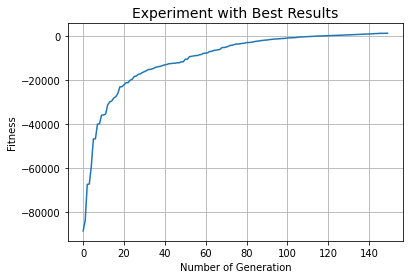

time: 2h 4min 17s


In [ ]:
# Press the green button in the gutter to run the script.
if __name__ == '__main__':

    #  initialization
    for i in range(population_size):
        population.append(initialize())

    # start of ga processes off number of generations
    for i in range(num_generations):
        print(i)
        #  child multiplier decides the # of children for this generation by multiplying pop_size * multiplier
        child_multiplier = random.randint(1, 9)
        #  get parents via tournament
        parents = tournament_selection(population)

        # create children using prob of actually doing crossover
        for i in range(0, len(parents), 2):
            if np.random.rand() < crossover_prob:
                A, B = uniform_crossover(parents[i], parents[i + 1])
            # if you aren't doing crossover, children just go in as copy of parents
            else:
                A = create_copy(parents[i])
                B = create_copy(parents[i + 1])
            children.append(A)
            children.append(B)

        #  run neighbor mutation on each chromosome that makes up the children
        for i in range(len(children)):
            children[i] = new_mut(children[i])

        #  create new generation of survivor selection
        #  combine current population with children, sort new list, and take the top solutions
        population = survivor_select(population, children)

        print_district_names(population[0])
        print(fitness_function(population[0]))
        fitness.append(fitness_function(population[0]))
        
        #  keep best result with elitism
        # first if statement is for 1st generation if best is empty
        if not best:
            # population[len(population) - 1] = best
            best = population[0]
            best_fit = fitness_function(population[0])

        if fitness_function(best) < fitness_function(population[0]):
            best = population[0]
            best_fit = fitness_function(population[0])

        #  clear children list for use in next generation
        children.clear()
        population[len(population) - 1] = best

    print("Best: ", best)
    print_district_names(best)
    print("fitness: " + str(best_fit))
    plt.plot(fitness)
    plt.grid()
    plt.xlabel('Number of Generation');
    plt.ylabel('Fitness');
    plt.title('Experiment with Best Results', fontsize=14);
    plt.show()